<a href="https://colab.research.google.com/github/JangYoonhyuk/OpenPose_movie/blob/master/openpose_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


오픈포즈 야구 매칭 

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

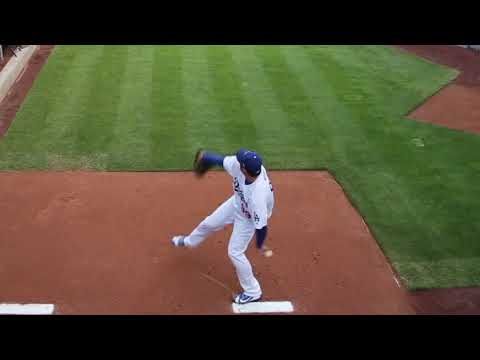

In [3]:
YOUTUBE_ID = 'VNx1-whhOME'


YouTubeVideo(YOUTUBE_ID)

In [4]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -ss 58 -t 10 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] VNx1-whhOME: Downloading webpage
[youtube] VNx1-whhOME: Downloading video info webpage
[youtube] VNx1-whhOME: Downloading MPD manifest
[dashsegments] Total fragments: 16
[download] Destination: youtube.mp4
[download] 100% of 26.50MiB in 00:13
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [56]:
import json



with open('/content/openpose/output/video_000000000000_keypoints.json', 'r') as f:

    json_data = json.load(f)

print(json.dumps(json_data) )




{"version": 1.3, "people": [{"person_id": [-1], "pose_keypoints_2d": [998.117, 177.201, 0.848947, 907.158, 218.306, 0.88689, 963.005, 227.23, 0.787532, 1018.84, 335.918, 0.816421, 1021.75, 262.414, 0.676207, 857.037, 200.603, 0.882199, 0, 0, 0, 0, 0, 0, 895.278, 441.985, 0.646307, 930.659, 447.892, 0.663556, 957.137, 597.889, 0.809296, 921.755, 771.603, 0.73055, 857.036, 439.046, 0.668429, 877.531, 601.03, 0.813115, 880.649, 768.674, 0.771305, 995.3, 165.312, 0.778993, 0, 0, 0, 960.065, 153.664, 0.876639, 0, 0, 0, 945.317, 809.818, 0.0641884, 954.15, 812.7, 0.0561864, 874.68, 786.457, 0.824943, 971.795, 827.515, 0.7734, 954.143, 827.49, 0.770327, 904.013, 789.199, 0.695559], "face_keypoints_2d": [], "hand_left_keypoints_2d": [], "hand_right_keypoints_2d": [], "pose_keypoints_3d": [], "face_keypoints_3d": [], "hand_left_keypoints_3d": [], "hand_right_keypoints_3d": []}]}


In [57]:
import json



with open('/content/openpose/output/video_000000000000_keypoints.json', 'r') as f:

    json_data = json.load(f)
bodypoint = json_data['people']['pose_keypoints_2d']

print(bodypoint)

TypeError: ignored

In [0]:
!cd openpose && ./build/examples/openpose/openpose.bin --video ../movie.mp4 --write_json ./output/ --display 0  --write_video ../openpose1.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose1.avi output1.mp4